In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('training_data.csv')
df_submission = pd.read_csv('submission_data.csv')
df_example_submission = pd.read_csv('example_submission.csv')
combine = [df_train, df_submission]
#df_train.drop('encounter_id', axis=1,inplace=True)
df_train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# the labels we are trying to predict
pred_labels = ['admission_type_id', 'discharge_disposition_id']

In [4]:
# this is how the data we will use for submission looks like 
df_submission.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id,discharge_disposition_id
0,77076,92519352,AfricanAmerican,Male,[50-60),?,7,4,?,?,...,No,No,No,No,No,Ch,Yes,<30,NaN,NaN
1,682494,64729746,AfricanAmerican,Female,[40-50),?,7,3,?,?,...,No,No,No,No,No,Ch,Yes,>30,NaN,NaN
2,6176166,4667985,Caucasian,Male,[60-70),?,1,8,?,Surgery-Cardiovascular/Thoracic,...,No,No,No,No,No,Ch,Yes,NO,NaN,NaN
3,10666374,4272444,Caucasian,Male,[0-10),?,4,3,?,Pediatrics-CriticalCare,...,No,No,No,No,No,No,Yes,NO,NaN,NaN
4,69854802,23643405,Caucasian,Female,[20-30),?,17,13,?,Nephrology,...,No,No,No,No,No,Ch,Yes,>30,NaN,NaN


In [5]:
# this is how we will have to submit it as
df_example_submission.head()

,encounter_id,admission_type_id,discharge_disposition_id
0,77076,25,6
1,682494,19,3
2,6176166,19,2
3,10666374,6,14
4,69854802,16,20


## 2: data cleanup

### 2.1: drop any rows with unknown in our labels-to-predict columns in our training data

In [6]:
df_train.dropna(subset = pred_labels, inplace=True)

### 2.2: view the unique data in each column 

In [7]:
temp = pd.concat([df_train,df_submission],axis=0)
for col in temp.columns:
    print(col, temp[col].value_counts(dropna=False), '\n\n')
    
len(temp.columns)

A1Cresult None    84696
>8       8209
Norm     4987
>7       3809
Name: A1Cresult, dtype: int64 


acarbose No        101393
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64 


acetohexamide No        101700
Steady         1
Name: acetohexamide, dtype: int64 


admission_source_id 7.0     57443
1.0     29557
17.0     6781
4.0      3184
6.0      2264
2.0      1103
5.0       853
3.0       187
20.0      161
9.0       125
8.0        16
22.0       12
10.0        8
11.0        2
14.0        2
25.0        2
13.0        1
Name: admission_source_id, dtype: int64 


admission_type_id  1.0    53328
 3.0    18688
 2.0    18303
 6.0     5265
 5.0     4774
NaN       999
 8.0      315
 7.0       19
 4.0       10
Name: admission_type_id, dtype: int64 


age [70-80)     26057
[60-70)     22467
[50-60)     17249
[80-90)     17175
[40-50)      9681
[30-40)      3774
[90-100)     2790
[20-30)      1656
[10-20)       691
[0-10)        161
Name: age, dtype: int64 


change No 

50

### from examining above, we now know the following: (please double click here to view with spacing)

#### CLEAN COLUMNS, type:
A1Cresult, categorical
admission_source_id, discrete valued
age, categorical
change, categorical
diabetesMed, categorical
encounter_id, discrete valued
insulin, categorical
max_glu_serum, categorical
metformin, categorical
num_procedures, discrete valued
readmitted, categorical
time_in_hospital, discrete valued


#### DROP COLUMNS, reason:

~99% of data in single category:
acarbose, 
acetohexamide, 
chlorpropamide, 
glipizide-metformin,
glyburide-metformin, 
nateglinide,
repaglinide

100% of data in single category :
citoglipton, 
troglitazone,
tolbutamide,
tolazamide,
examide, 
glimepiride-pioglitazone, 
metformin-pioglitazone, 
metformin-rosiglitazone, 
miglitol

patient_nbr, random number
payer_code, alot missing and what does payment have to do with diabetes
weight, almost all missing
medical_specialty, has ~50k unknowns

#### DIRTY COLUMNS, type, reason:
race, categorical, ~2000 '?' 
gender, binary, 3 'Unknown/Invalid' 


#### FURTHER EXAMINE, reason
diag_l, mix of numbers and letters
diag_2, mix of numbers and letters
diag_3, mix of numbers and letters
glipizide AND glyburide AND pioglitazone AND rosiglitazone AND glimepiride, 'No' has ~90% of data so maybe make a 'Yes' value represent the other 10%
num_lab_procedures, create more general categorization
num_medications, create more general categorization
number_diagnoses, create more general categorization
number_emergency, create more general categorization
number_inpatient/number_outpatient, create more general categorization

### 2.3: drop the columns 

In [8]:
cols_to_drop = [
'acarbose', 
'acetohexamide', 
'chlorpropamide', 
'glipizide-metformin',
'glyburide-metformin', 
'nateglinide',
'repaglinide',
'citoglipton', 
'troglitazone',
'tolbutamide',
'tolazamide',
'examide', 
'glimepiride-pioglitazone', 
'metformin-pioglitazone', 
'metformin-rosiglitazone', 
'miglitol',
'patient_nbr',
'payer_code',
'weight',
'medical_specialty',
'diag_1',
'diag_2',
'diag_3'
]

for df in combine:
    df.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
# remove the ~2000 rows that have unknown race
df_train = df_train[df_train['race'] != '?']
sum(df_train['race'] == '?')

# fill in the few missing rows in our submission set
df_submission.loc[df_submission['race'] == '?', 'race'] = 'Caucasian'          

In [10]:
# looking at gender, there is a 50/50 chance of being either race
# it is better to remove them
print(df_train['gender'].value_counts(), '\n')
df_train = df_train[df_train['gender'] != 'Unknown/Invalid']
sum(df_train['gender'] == 'Unknown/Invalid')

Female             53030
Male               45437
Unknown/Invalid        1
Name: gender, dtype: int64 



0

In [11]:
df_train.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392.0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


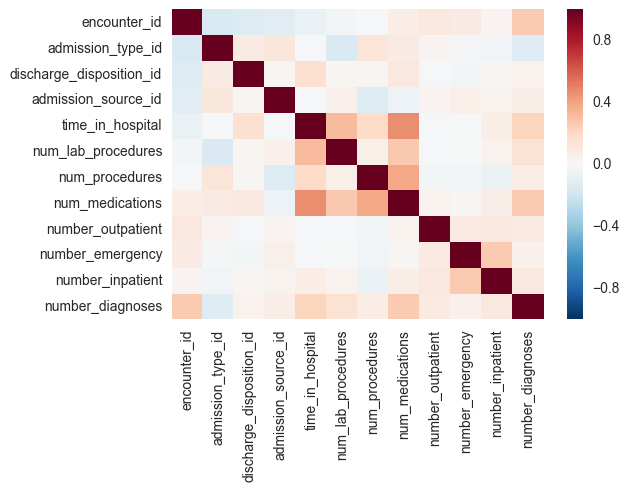

In [12]:
# heatmap of our training data as of now
sns.heatmap(df_train.corr())

### 2.4: dealing with columns that require further examination

In [13]:
# taking a look at the these columns once again
c = ['glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']
for _ in c:
    print(df_train[_].value_counts(),'\n')

No        86195
Steady    10978
Up          751
Down        543
Name: glipizide, dtype: int64 

No        88172
Steady     8968
Up          789
Down        538
Name: glyburide, dtype: int64 

No        91388
Steady     6735
Up          228
Down        116
Name: pioglitazone, dtype: int64 

No        92260
Steady     5949
Up          175
Down         83
Name: rosiglitazone, dtype: int64 



In [14]:
# categorize into either 'Yes' or 'No'
for _ in c:
    df_train.loc[(df_train[_] == 'Steady') | (df_train[_] == 'Up') | (df_train[_] == 'Down'), _] = 'Yes'
    df_submission.loc[(df_submission[_] == 'Steady') | (df_submission[_] == 'Up') | (df_submission[_] == 'Down'), _] = 'Yes'

In [15]:
# taking a look at the these columns once again
c = ['glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']
for _ in c:
    print(df_train[_].value_counts(),'\n')

No     86195
Yes    12272
Name: glipizide, dtype: int64 

No     88172
Yes    10295
Name: glyburide, dtype: int64 

No     91388
Yes     7079
Name: pioglitazone, dtype: int64 

No     92260
Yes     6207
Name: rosiglitazone, dtype: int64 



In [16]:
# generalize num_lab_procedures into categories
_ = 'num_lab_procedures'

print(len(df_train[(df_train[_] < 10) & (df_train[_] >= 0)]))
print(len(df_train[(df_train[_] < 20) & (df_train[_] >= 10)]))
print(len(df_train[(df_train[_] < 30) & (df_train[_] >= 20)]))
print(len(df_train[(df_train[_] < 40) & (df_train[_] >= 30)]))
print(len(df_train[(df_train[_] < 50) & (df_train[_] >= 40)]))
print(len(df_train[(df_train[_] < 60) & (df_train[_] >= 50)]))
print(len(df_train[(df_train[_] < 70) & (df_train[_] >= 60)]))
print(len(df_train[(df_train[_] < 80) & (df_train[_] >= 70)]))
print(len(df_train[(df_train[_] >= 80)]))

# split into 9 categories
for i in range(10, 100, 10):
    if i == 90:
        df_train.loc[df_train[_] >= (i-10), _] = int(str(i)[0])
        df_submission.loc[df_submission[_] >= (i-10), _] = int(str(i)[0])
    else:
        df_train.loc[(df_train[_] < i) & (df_train[_] >= (i-10)), _] = int(str(i)[0])
        df_submission.loc[(df_submission[_] < i) & (df_submission[_] >= (i-10)), _] = int(str(i)[0])

7306
6047
8791
16650
21857
17482
12593
5566
2175


In [17]:
# generalize num_medications into categories 
_ = 'num_medications'

print(len(df_train[(df_train[_] < 10) & (df_train[_] >= 0)]))
print(len(df_train[(df_train[_] < 20) & (df_train[_] >= 10)]))
print(len(df_train[(df_train[_] < 30) & (df_train[_] >= 20)]))
print(len(df_train[df_train[_] >= 30]))


# split into 4 categories
for i in range(10, 50, 10):
    if i == 40:
        df_train.loc[df_train[_] >= (i-10), _] = int(str(i)[0])
        df_submission.loc[df_submission[_] >= (i-10), _] = int(str(i)[0])
    else:
        df_train.loc[(df_train[_] < i) & (df_train[_] >= (i-10)), _] = int(str(i)[0])
        df_submission.loc[(df_submission[_] < i) & (df_submission[_] >= (i-10)), _] = int(str(i)[0])

19840
51933
20813
5881


In [18]:
# generalize number_diagnoses into categories
_ = 'number_diagnoses'

for i in range(1,20):
    print(len(df_train[(df_train[_] == i)]))


212
981
2750
5350
10637
9946
10109
10365
48016
15
10
9
16
6
8
37
0
0
0


In [19]:
# we can split number of diagnoses to <=4, 5, 6, 7, 8, >=9
# split into 6 categories


df_train.loc[df_train[_] < 5, _] = -5
df_submission.loc[df_submission[_] < 5, _] = -5

df_train.loc[df_train[_] > 8, _] = -8
df_submission.loc[df_submission[_] > 8, _] = -8

# change type
df_train[_] = df_train[_].astype(int).astype('str')
df_submission[_] = df_submission[_].astype(int).astype('str')


# now change those dummy values to correct string value
df_train.loc[df_train[_] == '-5', _] = '<5'
df_submission.loc[df_submission[_] == '-5', _] = '<5'

df_train.loc[df_train[_] == '-8', _] = '>8'
df_submission.loc[df_submission[_] == '-8', _] = '>8'

In [20]:
# now it looks like this
df_train['number_diagnoses'].value_counts()

>8    48117
5     10637
8     10365
7     10109
6      9946
<5     9293
Name: number_diagnoses, dtype: int64

In [21]:
# generalize number_inpatient/number_outpatient/number_emergency into binary categories
# they all have ~90% of data at value 0 
_i = 'number_inpatient'
_o = 'number_outpatient'
_e = 'number_emergency'
c=[_i, _o, _e]

print(list(df_train[_i].value_counts()))

for _ in c:
    df_train.loc[df_train[_] > 0, _] = 1
    df_submission.loc[df_submission[_] > 0, _] = 1

# changing these column datatypes to string
for _ in c:
    df_train[_] = df_train[_].astype(int).astype('str')
    df_submission[_] = df_submission[_].astype(int).astype('str')
    
# update column values
for _ in c:
    
    df_train.loc[df_train[_] == '1', _] = '>0'
    df_submission.loc[df_submission[_] == '1', _] = '>0'
    
print(list(df_train[_i].value_counts()))

[65151, 19014, 7399, 3327, 1593, 796, 477, 266, 146, 109, 58, 49, 34, 19, 10, 9, 5, 2, 1, 1, 1]
[65151, 33316]


In [22]:
df_train.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392.0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,5.0,0.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,6.0,0.0,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,2.0,5.0,...,No,No,Yes,No,No,No,No,No,Yes,NO
3,500364.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,5.0,1.0,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,6.0,0.0,...,No,No,Yes,No,No,No,Steady,Ch,Yes,NO


###  2.5: dealing with NULL in metadata (changing it to category 'unavailable')

In [23]:
# change values of 6 and 8 (null and unmapped) to 5 (unavailable)

df_train.loc[(df_train['admission_type_id'] == 6) | (df_train['admission_type_id'] == 8), 'admission_type_id'] = 5
df_submission.loc[(df_submission['admission_type_id'] == 6) | (df_submission['admission_type_id'] == 8), 'admission_type_id'] = 5

In [24]:
# change values of 18 and 25 (null and unmapped) to 26 (unknown/invalid)

df_train.loc[(df_train['discharge_disposition_id'] == 18) | (df_train['discharge_disposition_id'] == 25), 'discharge_disposition_id'] = 26
df_submission.loc[(df_submission['discharge_disposition_id'] == 18) | (df_submission['discharge_disposition_id'] == 25), 'discharge_disposition_id'] = 26

In [25]:
# change values of 17 and 20 (null and unmapped) to 21 (unknown/invalid)

df_train.loc[(df_train['admission_source_id'] == 17) | (df_train['admission_source_id'] == 20), 'admission_source_id'] = 21
df_submission.loc[(df_submission['admission_source_id'] == 17) | (df_submission['admission_source_id'] == 20), 'admission_source_id'] = 21

## 3: Predictions

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


### 3.1: one-hot-encoding

In [27]:
df_train.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392.0,Caucasian,Female,[0-10),5.0,26.0,1.0,1.0,5.0,0.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,6.0,0.0,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,2.0,5.0,...,No,No,Yes,No,No,No,No,No,Yes,NO
3,500364.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,5.0,1.0,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,6.0,0.0,...,No,No,Yes,No,No,No,Steady,Ch,Yes,NO


need to one-hot-encode the following:

A1Cresult, categorical
admission_source_id, discrete valued
age, categorical
change, categorical
diabetesMed, categorical
insulin, categorical
max_glu_serum, categorical
metformin, categorical
num_procedures, discrete valued
readmitted, categorical
time_in_hospital, discrete valued
race, categorical 
glipizide AND glyburide AND pioglitazone AND rosiglitazone AND glimepiride
num_lab_procedures
num_medications
number_diagnoses
number_emergency
number_inpatient/number_outpatient

In [28]:
one_hot = [
    'A1Cresult','admission_source_id','age', 'change', 'diabetesMed', 'insulin', 
    'max_glu_serum', 'metformin', 'num_procedures', 'readmitted', 'time_in_hospital',  
    'race', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'glimepiride',
    'num_lab_procedures','num_medications','number_diagnoses',"number_emergency",
    'number_inpatient', 'number_outpatient', 'gender'
]

In [29]:
for col in one_hot:
        new = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
        df_train.drop(col, axis=1, inplace=True)
        df_train = pd.concat((df_train,new),axis=1)
        
        new = pd.get_dummies(df_submission[col], prefix=col, drop_first=True)
        df_submission.drop(col, axis=1, inplace=True)
        df_submission = pd.concat((df_submission,new),axis=1)

print(len(df_train.columns))

92


### 3.2: train test

In [30]:
X = df_train.drop(pred_labels, axis=1)
y_admission = df_train[pred_labels[0]]
y_disposition = df_train[pred_labels[1]]

In [31]:
# one hot encode labels 
y_admission = pd.get_dummies(y_admission)
y_disposition = pd.get_dummies(y_disposition)

### 3.3: admission prediction

In [387]:
X_train, X_test, y_train_admission, y_test_admission = train_test_split(X.as_matrix(), y_admission.as_matrix(), test_size=0.3)

In [389]:
admission_model = Sequential()
admission_model.add(Dense(units=1000, input_dim=90, activation='relu'))
admission_model.add(Dropout(0.2))
admission_model.add(Dense(units=250, activation='relu'))
admission_model.add(Dropout(0.2))
admission_model.add(Dense(units=6, activation='softmax'))

admission_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [390]:
# fit model

admission_model.fit(X_train, y_train_admission, validation_split=0.2)

Train on 55140 samples, validate on 13786 samples
Epoch 1/10
55140/55140 [==============================] - 7s - loss: 13.2222 - acc: 0.1797 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 2/10
55140/55140 [==============================] - 7s - loss: 13.2564 - acc: 0.1775 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 3/10
55140/55140 [==============================] - 8s - loss: 13.2096 - acc: 0.1804 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 4/10
55140/55140 [==============================] - 8s - loss: 13.2315 - acc: 0.1791 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 5/10
55140/55140 [==============================] - 7s - loss: 13.2540 - acc: 0.1777 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 6/10
55140/55140 [==============================] - 8s - loss: 13.2368 - acc: 0.1788 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 7/10
55140/55140 [==============================] - 7s - loss: 13.2631 - acc: 0.1771 - val_loss: 13.2817 - val_acc: 0.1760
Epoch 8/10
55140/55140 [=======================

In [392]:
admission_model.evaluate(X_test, y_test_admission)

29056/29541 [============================>.] - ETA: 0s

[13.218682480271621, 0.17988558274990357]

In [393]:
# keras did it pretty bad. scikit time
X_train, X_test, y_train_admission, y_test_admission = train_test_split(X, y_admission, test_size=0.3)

In [395]:
# RANDOM FOREST

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [397]:
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.232422734505


In [ ]:
# SVC

y_admission = df_train[pred_labels[0]]
X_train, X_test, y_train_admission, y_test_admission = train_test_split(X, y_admission, test_size=0.3)

# param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1, 0, 0.1, 0.01, 0.001, 0.0001]}

svc = SVC() #GridSearchCV(SVC(), param_grid, verbose=1)
svc.fit(X_train, y_train_admission)
pred=svc.predict(X_test)

acc_svc=accuracy_score(pred, y_test)
print(acc_svc)

### disposition prediction

In [33]:
X_train, X_test, y_train_disposition, y_test_disposition = train_test_split(X.as_matrix(), y_disposition.as_matrix(), test_size=0.3)

In [35]:
disposition_model = Sequential()
disposition_model.add(Dense(units=1000, input_dim=90, activation='relu', kernel_constraint=maxnorm(3)))
disposition_model.add(Dropout(0.2))
disposition_model.add(Dense(units=500, activation='relu', kernel_constraint=maxnorm(3)))
disposition_model.add(Dropout(0.2))
disposition_model.add(Dense(units=25, activation='softmax'))

disposition_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [39]:
disposition_model.fit(X_train, y_train_disposition, validation_split=0.2)

Train on 55140 samples, validate on 13786 samples
Epoch 1/10
55140/55140 [==============================] - 27s - loss: 15.9772 - acc: 0.0087 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/10
55140/55140 [==============================] - 28s - loss: 15.9857 - acc: 0.0082 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/10
55140/55140 [==============================] - 28s - loss: 15.9752 - acc: 0.0089 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/10
55140/55140 [==============================] - 29s - loss: 15.9757 - acc: 0.0088 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/10
55140/55140 [==============================] - 30s - loss: 15.9728 - acc: 0.0090 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/10
55140/55140 [==============================] - 31s - loss: 15.9775 - acc: 0.0087 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/10
55140/55140 [==============================] - 32s - loss: 15.9833 - acc: 0.0084 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 8/10
5

In [38]:
y_train_disposition

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)